In [ ]:
# Googleドライブをマウント
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Google ColaboratoryでZipファイルを解凍
from zipfile import ZipFile
file_name = '/content/drive/My Drive/Covid19.zip'

with ZipFile(file_name, 'r') as zip:
  zip.extractall()

In [ ]:
%tensorflow_version 1.x
import numpy as np
import keras
from keras.utils import np_utils
from keras.models import Sequential, Model, model_from_json
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from PIL import Image
import glob
%matplotlib inline

TensorFlow 1.x selected.


Using TensorFlow backend.


In [ ]:
folder = ["COVID", "non-COVID"]
image_size = 120

X_train = []
y_train = []
X_test = []
y_test = []


for index, name in enumerate(folder):
    dir = "/content/Covid19/train/" + name
    files = glob.glob(dir + "/*.png")
    for i, file in enumerate(files):
        image = Image.open(file)
        image = image.convert("RGB")
        image = image.resize((image_size, image_size))
        data = np.asarray(image)
        X_train.append(data)
        y_train.append(index)
        shuffle=True
        
        
for index, name in enumerate(folder):
    dir = "/content/Covid19/validation/" + name
    files = glob.glob(dir + "/*.png")
    for i, file in enumerate(files):
        image = Image.open(file)
        image = image.convert("RGB")
        image = image.resize((image_size, image_size))
        data = np.asarray(image)
        X_test.append(data)
        y_test.append(index)
        shuffle=True
        
        
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

X_train = X_train.astype('float32')
X_train = X_train / 255.0

X_test = X_test.astype('float32')
X_test = X_test / 255.0

# 正解ラベルの形式を変換
y_train = np_utils.to_categorical(y_train, 2)
y_test = np_utils.to_categorical(y_test,2)

In [ ]:
def model_train(X_train, y_train):
    model = Sequential()

    model.add(Conv2D(32, (3, 3), padding='same',input_shape=X_train.shape[1:]))
    model.add(Activation('relu'))
    model.add(Conv2D(32, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.20))
 
    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.20))
    
    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.20)) 
 
    model.add(Flatten())
    model.add(Dense(64))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(2))
    model.add(Activation('softmax'))
    opt = keras.optimizers.adam(lr=0.0001, decay=1e-6)
    model.compile(loss='categorical_crossentropy',optimizer= opt,metrics=['accuracy'])
    return model

In [ ]:
def plot_history(history):
    plt.plot(history.history['accuracy'],"o-",label="accuracy")
    plt.plot(history.history['val_accuracy'],"o-",label="val_acc")
    plt.title('model accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend(loc="lower right")
    plt.show()
 
    plt.plot(history.history['loss'],"o-",label="loss",)
    plt.plot(history.history['val_loss'],"o-",label="val_loss")
    plt.title('model loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(loc='lower right')
    plt.show()

In [ ]:
#ROCを定義    
def plot_roc(pred,y):
    fpr, tpr, _ = roc_curve(y, pred)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc) # %0.2fで小数点第2位まで表示を指示
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()


Train on 1984 samples, validate on 497 samples
Epoch 1/100
1984/1984 [==============================] - 6s 3ms/step - loss: 0.6914 - accuracy: 0.5146 - val_loss: 0.6867 - val_accuracy: 0.5050
Epoch 2/100
1984/1984 [==============================] - 2s 1ms/step - loss: 0.6759 - accuracy: 0.5852 - val_loss: 0.6721 - val_accuracy: 0.6157
Epoch 3/100
1984/1984 [==============================] - 2s 1ms/step - loss: 0.6534 - accuracy: 0.6058 - val_loss: 0.6421 - val_accuracy: 0.5815
Epoch 4/100
1984/1984 [==============================] - 2s 1ms/step - loss: 0.6223 - accuracy: 0.6492 - val_loss: 0.5967 - val_accuracy: 0.7485
Epoch 5/100
1984/1984 [==============================] - 2s 1ms/step - loss: 0.5908 - accuracy: 0.6820 - val_loss: 0.5752 - val_accuracy: 0.7505
Epoch 6/100
1984/1984 [==============================] - 2s 1ms/step - loss: 0.5847 - accuracy: 0.6885 - val_loss: 0.5868 - val_accuracy: 0.6660
Epoch 7/100
1984/1984 [==============================] - 3s 1ms/step - loss: 0.5784

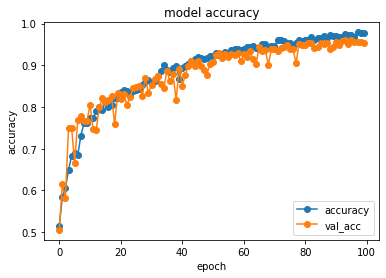

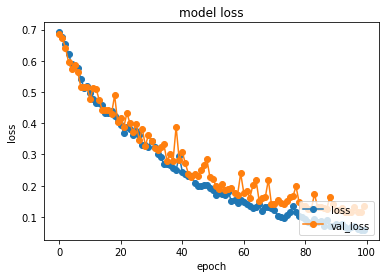

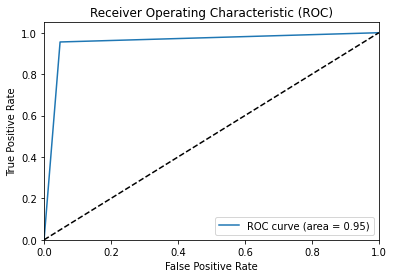

In [ ]:
if __name__ == "__main__":
    model = model_train(X_train, y_train)
    history = model.fit(X_train, y_train, 
        epochs=100,
        batch_size=128,
        validation_data=(X_test, y_test),
             )
    json_string = model.to_json()
    open('Covid19.json', 'w').write(json_string)
    model.save_weights('Covid19hdf5')
    model.save("Covid19.h5")
    score = model.evaluate(X_train, y_train)
    
    print("test loss", score[0])
    print("test acc",  score[1])

    plot_history(history)
    
    #ROC
    pred = model.predict(X_test)
    pred = np.argmax(pred,axis=1)
    y_compare = np.argmax(y_test,axis=1)
    pred = pred[:] # Only positive cases
    plot_roc(pred,y_compare)

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 120, 120, 32)      896       
_________________________________________________________________
activation_9 (Activation)    (None, 120, 120, 32)      0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 118, 118, 32)      9248      
_________________________________________________________________
activation_10 (Activation)   (None, 118, 118, 32)      0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 59, 59, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 59, 59, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 59, 59, 64)       